In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt#载入数据库
order = pd.read_csv(r"C:\Users\84011\Desktop\fujian2.csv",encoding = 'gbk')##读取附件

In [2]:
order=order[ ~ order['支付时间'].str.contains('PM')]
order['支付时间'] = pd.to_datetime(order['支付时间'])
periodIndex = pd.PeriodIndex(order['支付时间'],freq = 'D')
order['paytime']=periodIndex
print(order)##对D号售货机的错误时间数据进行处理，并将日期转换为Datetime类型数据，并只截取每日信息

                                  订单号             设备ID  应付金额  实际金额  \
0       DD201708167493663618499909784  E43A6E078A07631   4.5   4.5   
1       DD201708167493663555814061164  E43A6E078A04172   3.0   3.0   
2       DD201708167493578526890939886  E43A6E078A06874   5.5   5.5   
3       DD201708167493683507186615837  E43A6E078A04228   5.0   5.0   
4       DD201708167493759548618252006  E43A6E078A04134   3.0   3.0   
5       DD2017081016294251D0FA5D314F1  E43A6E078A04134   4.5   4.5   
6       DD201708167493663534589050871  E43A6E078A04228   7.0   7.0   
7       DD201708167493663526093267894  E43A6E078A04228   8.0   8.0   
8       DD20170526144916178D2B0429C26  E43A6E078A04134   3.0   3.0   
9       DD20170810162914447BA58EF3127  E43A6E078A04228   2.0   2.0   
10     DD2017081674930611792937303584  E43A6E078A07631   5.0   5.0   
11     DD2017081674930612078044876854  E43A6E078A04228   3.0   3.0   
12      DD2017083114403518C7B2A1F9252  E43A6E078A04228   3.0   3.0   
13      DD2017081674

In [3]:
order1= order.copy() 
jiqi1=order.loc[order['设备ID']=='E43A6E078A07631', ['设备ID','商品','大类','paytime']]
jiqi2=order.loc[order['设备ID']=='E43A6E078A04134', ['设备ID','商品','大类','paytime']]
jiqi3=order.loc[order['设备ID']=='E43A6E078A04172', ['设备ID','商品','大类','paytime']]
jiqi4=order.loc[order['设备ID']=='E43A6E078A04228', ['设备ID','商品','大类','paytime']]
jiqi5=order.loc[order['设备ID']=='E43A6E078A06874', ['设备ID','商品','大类','paytime']]#分别提取五台售货机的数据，下面操作类似

In [5]:
dalei1=jiqi1.loc[order['大类']=='饮料',['设备ID','商品','大类','paytime']]#分别提取五台售货机中其中大类的数据，下面操作类似

In [6]:
orderGroup1=dalei1.groupby(by='paytime')#通过groupby函数进行分组聚合，下面操作类似

In [7]:
s1=orderGroup1['设备ID'].agg(np.size)
s1.to_csv('C:/Users/84011/Desktop/s1.csv')#输出数据为文件，下面操作类似

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  


In [19]:
s11 = pd.read_csv(r"C:\Users\84011\Desktop\s1.csv",index_col=u'paytime',encoding = 'gbk')#读取文件信息，下面操作类似
plt.rcParams['font.sans-serif'] = 'SimHei' ## 设置中文显示
plt.rcParams['axes.unicode_minus'] = False

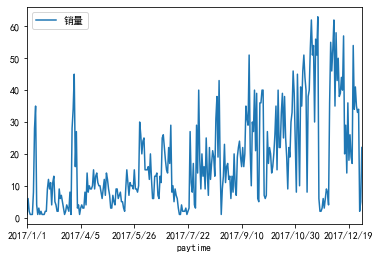

In [20]:
s11.plot()
plt.show()#画出销量变化图，下面操作类似

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


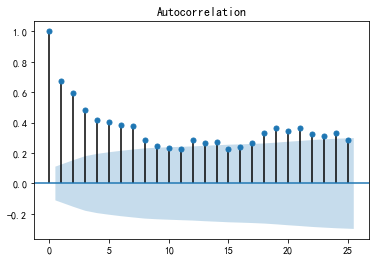

In [21]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(s11['销量']).show() #画出自相关图，下面操作类似

In [22]:
from statsmodels.tsa.stattools import adfuller as ADF
print('原始序列的ADF检验结果为:',ADF(s11[u'销量']))#进行ADF检测，1%,5%,10%三个置信区间下值判断ADF检验是否通过，下面操作类似

原始序列的ADF检验结果为: (-2.7246139560436067, 0.06987496549028316, 11, 301, {'1%': -3.452263435801039, '5%': -2.871190526189069, '10%': -2.571911967527952}, 2238.3769479852826)


In [23]:
D_s11 = s11.diff(1).dropna()
D_s11.columns = [u'销量差分']#进行1阶差分，下面操作类似

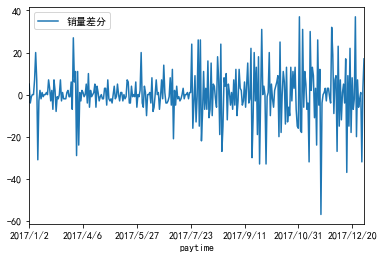

In [24]:
D_s11.plot()
plt.show()#输出1阶差分图，下面操作类似

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """Entry point for launching an IPython kernel.


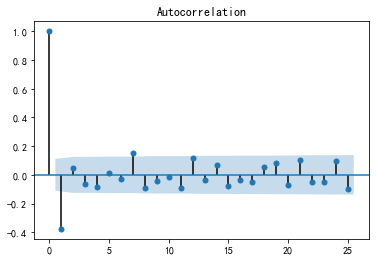

In [25]:
plot_acf(D_s11).show()
plt.show()#输出自相关图，下面操作类似

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


差分序列的ADF检验结果为： (-7.566940920486424, 2.9088886504816544e-11, 16, 295, {'1%': -3.452713099849546, '5%': -2.871387839457783, '10%': -2.5720171933352485}, 2234.7092038184646)


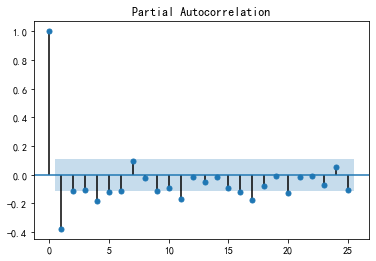

In [26]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(D_s11).show()
print(u'差分序列的ADF检验结果为：', ADF(D_s11[u'销量差分']))#进行ADF检验，判读是否通过检验，并输出骗相关图，下面操作类似

In [27]:
from statsmodels.stats.diagnostic import acorr_ljungbox
print(u'差分序列的白噪声检验结果为：', acorr_ljungbox(D_s11, lags=1))#进行白噪声检验，下面操作类似

差分序列的白噪声检验结果为： (array([44.65877598]), array([2.34543943e-11]))


In [28]:
from statsmodels.tsa.arima_model import ARIMA

In [29]:
pmax = int(len(D_s11)/10)

In [30]:
qmax = int(len(D_s11)/10)

In [ ]:
bic_matrix = [] 
for p in range(pmax+1):
 tmp = []
 for q in range(qmax+1):
#存在部分报错，所以用try来跳过报错。
    try: 
     tmp.append(ARIMA(s11, (p,1,q)).fit().bic)
    except:
     tmp.append(None)
bic_matrix.append(tmp)

D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored whe

D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored whe

D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored whe

D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored whe

D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored whe

D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored whe

D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored whe

D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored whe

D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored whe

D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored whe

D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored whe

D:\Anaconda\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
D:\Anaconda\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, b

D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored whe

D:\Anaconda\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
D:\Anaconda\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
D:\Anaconda\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization fai

D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored whe

D:\Anaconda\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
D:\Anaconda\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been 

D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored whe

D:\Anaconda\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
D:\Anaconda\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, b

D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored whe

D:\Anaconda\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
D:\Anaconda\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, b

D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored whe

D:\Anaconda\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
D:\Anaconda\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
D:\Anaconda\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian f

D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored whe

D:\Anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:695: RuntimeWarning: invalid value encountered in log
  invmacoefs = -np.log((1-macoefs)/(1+macoefs))
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py

D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored whe

D:\Anaconda\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
D:\Anaconda\lib\site-packages\statsmodel

D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored whe

D:\Anaconda\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
D:\Anaconda\lib\site-packages\statsmodel

D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored whe

D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored whe

D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored whe

D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored whe

D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [48]:
bic_matrix = pd.DataFrame(bic_matrix) 
 
#先用stack展平，然后用idxmin找出最小值位置。
 
p,q = bic_matrix.stack().idxmin() 


In [31]:
model = ARIMA(s11, (2,1,2)).fit() 
 
#给出一份模型报告，下面操作类似
 
model.summary2() 



D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: ARIMA
===================================================================
Model:              ARIMA            BIC:                 2371.2398
Dependent Variable: D.销量             Log-Likelihood:      -1168.4  
Date:               2019-08-26 22:12 Scale:               1.0000   
No. Observations:   312              Method:              css-mle  
Df Model:           5                Sample:              1        
Df Residuals:       307                                   3        
Converged:          1.0000           S.D. of innovations: 10.164   
No. Iterations:     13.0000          HQIC:                2357.758 
AIC:                2348.7818                                      
--------------------------------------------------------------------
                 Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
--------------------------------------------------------------------
const            0.0957    0.0150   6.3978  0.0000   0.0664   0.1250
ar.L1.D.销量       0.2683    0.2365   1.1347  0.2574  -0.1952   0.7319
ar.L2.D.销量       0.2482    0.1235   2.0091  0.0454   0.0061   0.4903
ma.L1.D.销量      -0.8448    0.2405  -3.5128  0.0005  -1.3161  -0.3734
ma.L2.D.销量      -0.1552    0.2403  -0.6461  0.5187  -0.6261   0.3157
----------------------------------------------------------------------------
                Real           Imaginary          Modulus          Frequency
----------------------------------------------------------------------------
AR.1           1.5382             0.0000           1.5382             0.0000
AR.2          -2.6193             0.0000           2.6193             0.5000
MA.1           1.0000             0.0000           1.0000             0.0000
MA.2          -6.4422             0.0000           6.4422             0.5000
===================================================================

"""

In [32]:

model.forecast(31)#预测31天数据，下面操作类似


(array([23.98355228, 27.73793328, 29.28399715, 30.67698751, 31.48079077,
        32.08849352, 32.49733528, 32.80414039, 33.03420634, 33.21835372,
        33.37113207, 33.50409549, 33.62395574, 33.73538165, 33.84129199,
        33.94362881, 34.0436377 , 34.14213493, 34.23964872, 34.33652341,
        34.4329825 , 34.52917144, 34.62518474, 34.72108385, 34.81690872,
        34.91268532, 35.00843055, 35.10415538, 35.19986695, 35.2955699 ,
        35.39126724]),
 array([10.16444906, 11.03867917, 11.63535561, 11.81554805, 11.90597011,
        11.94018208, 11.95554471, 11.96179931, 11.96449943, 11.96562619,
        11.96610594, 11.96630782, 11.96639337, 11.96642947, 11.96644475,
        11.9664512 , 11.96645393, 11.96645508, 11.96645557, 11.96645577,
        11.96645586, 11.9664559 , 11.96645591, 11.96645592, 11.96645592,
        11.96645592, 11.96645592, 11.96645592, 11.96645592, 11.96645592,
        11.96645592]),
 array([[ 4.0615982 , 43.90550637],
        [ 6.10251967, 49.3733469 ],
      

In [42]:
dalei2=jiqi2.loc[order['大类']=='饮料',['设备ID','商品','大类','paytime']]
dalei3=jiqi3.loc[order['大类']=='饮料',['设备ID','商品','大类','paytime']]
dalei4=jiqi4.loc[order['大类']=='饮料',['设备ID','商品','大类','paytime']]
dalei5=jiqi5.loc[order['大类']=='饮料',['设备ID','商品','大类','paytime']]

In [43]:
orderGroup2=dalei2.groupby(by='paytime')
orderGroup3=dalei3.groupby(by='paytime')
orderGroup4=dalei4.groupby(by='paytime')
orderGroup5=dalei5.groupby(by='paytime')

In [44]:
s2=orderGroup2['设备ID'].agg(np.size)
s2.to_csv('C:/Users/84011/Desktop/s2.csv')
s3=orderGroup3['设备ID'].agg(np.size)
s3.to_csv('C:/Users/84011/Desktop/s3.csv')
s4=orderGroup4['设备ID'].agg(np.size)
s4.to_csv('C:/Users/84011/Desktop/s4.csv')
s5=orderGroup5['设备ID'].agg(np.size)
s5.to_csv('C:/Users/84011/Desktop/s5.csv')

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  after removing the cwd from sys.path.
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataF

In [4]:
s22 = pd.read_csv(r"C:\Users\84011\Desktop\s2.csv",index_col=u'paytime',encoding = 'gbk')
s33 = pd.read_csv(r"C:\Users\84011\Desktop\s3.csv",index_col=u'paytime',encoding = 'gbk')
s44 = pd.read_csv(r"C:\Users\84011\Desktop\s4.csv",index_col=u'paytime',encoding = 'gbk')
s55 = pd.read_csv(r"C:\Users\84011\Desktop\s5.csv",index_col=u'paytime',encoding = 'gbk')
plt.rcParams['font.sans-serif'] = 'SimHei' ## 设置中文显示
plt.rcParams['axes.unicode_minus'] = False

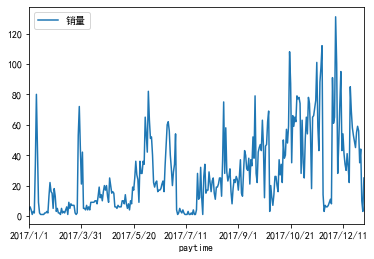

In [5]:
s22.plot()
plt.show()

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


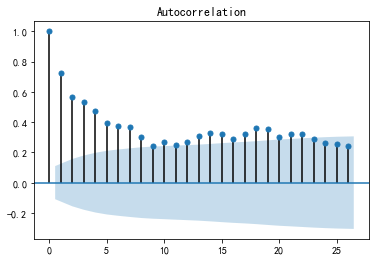

In [6]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(s22['销量']).show() 

In [7]:
from statsmodels.tsa.stattools import adfuller as ADF
print('原始序列的ADF检验结果为:',ADF(s22[u'销量']))

原始序列的ADF检验结果为: (-4.702545043163789, 8.323124847685501e-05, 2, 318, {'1%': -3.451082300831733, '5%': -2.87067210822307, '10%': -2.5716355136268345}, 2580.0967665901376)


In [8]:
D_s22 = s22.diff(1).dropna()
D_s22.columns = [u'销量差分']

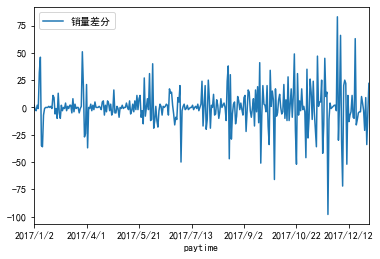

In [9]:
D_s22.plot()
plt.show()

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """Entry point for launching an IPython kernel.


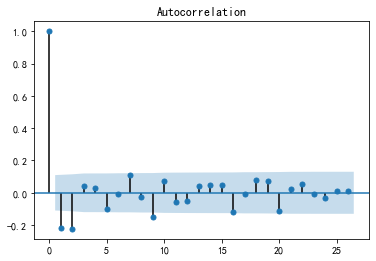

In [10]:
plot_acf(D_s22).show()
plt.show()

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


差分序列的ADF检验结果为： (-7.15459737220133, 3.078034857867287e-10, 16, 303, {'1%': -3.4521175397304784, '5%': -2.8711265007266666, '10%': -2.571877823851692}, 2578.8816087822697)


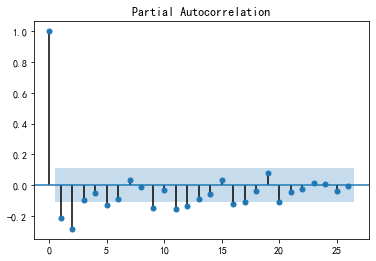

In [12]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(D_s22).show()
print(u'差分序列的ADF检验结果为：', ADF(D_s22[u'销量差分']))

In [13]:
from statsmodels.stats.diagnostic import acorr_ljungbox
print(u'差分序列的白噪声检验结果为：', acorr_ljungbox(D_s22, lags=1))

差分序列的白噪声检验结果为： (array([14.9553615]), array([0.00011008]))


In [14]:
from statsmodels.tsa.arima_model import ARIMA

In [15]:
pmax = int(len(D_s22)/10)
qmax = int(len(D_s22)/10)

In [ ]:
bic_matrix = [] 
for p in range(pmax+1):
 tmp = []
 for q in range(qmax+1):
#存在部分报错，所以用try来跳过报错。
    try: 
     tmp.append(ARIMA(s22, (p,1,q)).fit().bic)
    except:
     tmp.append(None)
bic_matrix.append(tmp)

D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored whe

D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored whe

D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored whe

D:\Anaconda\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
D:\Anaconda\lib\site-packages\statsmodel

D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored whe

In [ ]:
bic_matrix = pd.DataFrame(bic_matrix) 
 
#先用stack展平，然后用idxmin找出最小值位置。
 
p,q = bic_matrix.stack().idxmin() 

In [17]:
model1 = ARIMA(s22, (3,1,3)).fit() 
 
#给出一份模型报告
 
model1.summary2() 

D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
D:\Anaconda\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
D:\Anaconda\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: ARIMA
===================================================================
Model:              ARIMA            BIC:                 2758.9497
Dependent Variable: D.销量             Log-Likelihood:      -1356.4  
Date:               2019-08-26 22:11 Scale:               1.0000   
No. Observations:   320              Method:              css-mle  
Df Model:           7                Sample:              1        
Df Residuals:       313                                   1        
Converged:          0.0000           S.D. of innovations: 16.576   
No. Iterations:     29.0000          HQIC:                2740.841 
AIC:                2728.8031                                      
--------------------------------------------------------------------
                 Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
--------------------------------------------------------------------
const            0.1474    0.0254   5.8007  0.0000   0.0976   0.1972
ar.L1.D.销量      -0.3378    0.0504  -6.6955  0.0000  -0.4366  -0.2389
ar.L2.D.销量      -0.4149    0.0453  -9.1621  0.0000  -0.5036  -0.3261
ar.L3.D.销量       0.6028    0.0456  13.2084  0.0000   0.5134   0.6923
ma.L1.D.销量      -0.0321    0.0247  -1.3018  0.1939  -0.0804   0.0162
ma.L2.D.销量       0.0321    0.0244   1.3162  0.1891  -0.0157   0.0799
ma.L3.D.销量      -1.0000       nan      nan     nan      nan      nan
----------------------------------------------------------------------------
                Real           Imaginary          Modulus          Frequency
----------------------------------------------------------------------------
AR.1          -0.4776            -0.8839           1.0047            -0.3288
AR.2          -0.4776             0.8839           1.0047             0.3288
AR.3           1.6434            -0.0000           1.6434            -0.0000
MA.1           1.0000            -0.0000           1.0000            -0.0000
MA.2          -0.4839            -0.8751           1.0000            -0.3304
MA.3          -0.4839             0.8751           1.0000             0.3304
===================================================================

"""

In [18]:
model1.forecast(31)

(array([33.10262642, 39.11767412, 48.48993434, 47.88274271, 47.99479376,
        54.02812004, 51.74731702, 50.25148893, 55.50947145, 53.14875304,
        51.03234007, 56.06568907, 53.99014248, 51.49651087, 56.40353618,
        54.699068  , 51.90512067, 56.68346935, 55.370754  , 52.31684296,
        56.94289005, 56.025628  , 52.74463024, 57.19149464, 56.6673553 ,
        53.19102966, 57.43274732, 57.29591857, 53.65614524, 57.66870838,
        57.91056833]),
 array([16.5758049 , 19.59231124, 20.5411041 , 20.84978275, 21.00261138,
        21.04807413, 21.05775466, 21.07058811, 21.0730219 , 21.073041  ,
        21.07546982, 21.07569198, 21.07648241, 21.07757264, 21.07766283,
        21.07880888, 21.07955948, 21.07967008, 21.08091793, 21.08149789,
        21.0816633 , 21.0829327 , 21.08338274, 21.08361895, 21.084877  ,
        21.08521522, 21.08553094, 21.08675675, 21.08699822, 21.08739774,
        21.0885744 ]),
 array([[ 0.61464581, 65.59060703],
        [ 0.71744972, 77.51789853],
      

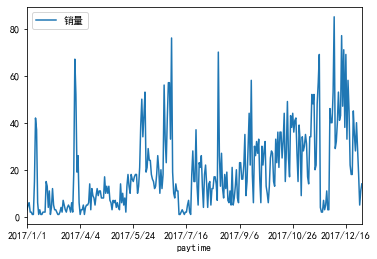

In [33]:
s33.plot()
plt.show()

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


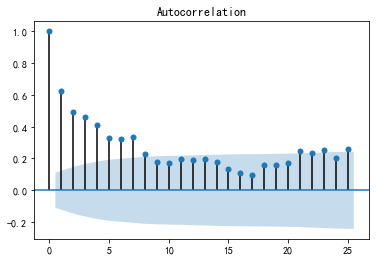

In [34]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(s33['销量']).show() 

In [35]:
from statsmodels.tsa.stattools import adfuller as ADF
print('原始序列的ADF检验结果为:',ADF(s33[u'销量']))

原始序列的ADF检验结果为: (-3.952765816634552, 0.0016790734015997605, 7, 308, {'1%': -3.45176116018037, '5%': -2.870970093607691, '10%': -2.571794416006072}, 2379.0804263041487)


In [36]:
D_s33 = s33.diff(1).dropna()
D_s33.columns = [u'销量差分']

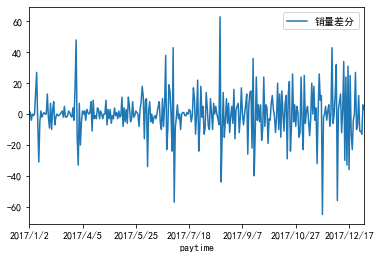

In [37]:
D_s33.plot()
plt.show()

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """Entry point for launching an IPython kernel.


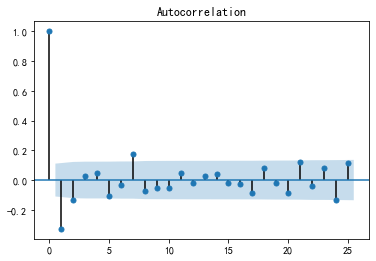

In [38]:
plot_acf(D_s33).show()
plt.show()

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


差分序列的ADF检验结果为： (-7.629453802010368, 2.0270714823589185e-11, 10, 304, {'1%': -3.452045317832011, '5%': -2.871094805558846, '10%': -2.571860921485457}, 2384.190844551538)


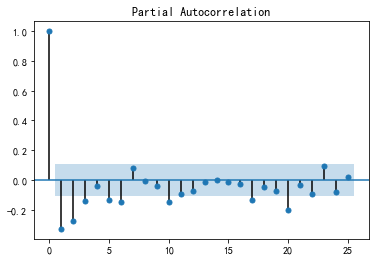

In [39]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(D_s33).show()
print(u'差分序列的ADF检验结果为：', ADF(D_s33[u'销量差分']))

In [53]:
from statsmodels.stats.diagnostic import acorr_ljungbox
print(u'差分序列的白噪声检验结果为：', acorr_ljungbox(D_s33, lags=1))

差分序列的白噪声检验结果为： (array([34.28702322]), array([4.75542085e-09]))


In [54]:
from statsmodels.tsa.arima_model import ARIMA
pmax = int(len(D_s33)/10)
qmax = int(len(D_s33)/10)

In [ ]:
bic_matrix = [] 
for p in range(pmax+1):
 tmp = []
 for q in range(qmax+1):
#存在部分报错，所以用try来跳过报错。
    try: 
     tmp.append(ARIMA(s33, (p,1,q)).fit().bic)
    except:
     tmp.append(None)
bic_matrix.append(tmp)
bic_matrix = pd.DataFrame(bic_matrix) 
 
#先用stack展平，然后用idxmin找出最小值位置。
 
p,q = bic_matrix.stack().idxmin() 

In [43]:
model2 = ARIMA(s33, (2,1,2)).fit() 
 
#给出一份模型报告
 
model2.summary2() 

D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: ARIMA
===================================================================
Model:              ARIMA            BIC:                 2529.0579
Dependent Variable: D.销量             Log-Likelihood:      -1247.3  
Date:               2019-08-26 22:23 Scale:               1.0000   
No. Observations:   315              Method:              css-mle  
Df Model:           5                Sample:              1        
Df Residuals:       310                                   6        
Converged:          1.0000           S.D. of innovations: 12.590   
No. Iterations:     14.0000          HQIC:                2515.538 
AIC:                2506.5425                                      
--------------------------------------------------------------------
                Coef.   Std.Err.     t      P>|t|    [0.025   0.975]
--------------------------------------------------------------------
const           0.0912    0.0154    5.9406  0.0000   0.0611   0.1213
ar.L1.D.销量     -0.4617    0.0543   -8.4962  0.0000  -0.5682  -0.3552
ar.L2.D.销量      0.4695    0.0525    8.9391  0.0000   0.3666   0.5725
ma.L1.D.销量     -0.0196    0.0206   -0.9486  0.3436  -0.0600   0.0209
ma.L2.D.销量     -0.9804    0.0205  -47.7436  0.0000  -1.0207  -0.9402
----------------------------------------------------------------------------
                Real           Imaginary          Modulus          Frequency
----------------------------------------------------------------------------
AR.1          -1.0483             0.0000           1.0483             0.5000
AR.2           2.0316             0.0000           2.0316             0.0000
MA.1           1.0000             0.0000           1.0000             0.0000
MA.2          -1.0200             0.0000           1.0200             0.5000
===================================================================

"""

In [44]:
model2.forecast(31)

(array([22.66203741, 29.83241013, 30.67958841, 33.74572581, 32.81842165,
        34.77672911, 33.52771334, 35.11438471, 33.88589389, 35.28859232,
        34.15467703, 35.42732889, 34.39786139, 35.5612292 , 34.63125903,
        35.69737712, 34.85902375, 35.83718104, 35.08245567, 35.98070199,
        35.30213708, 36.1276998 , 35.51845224, 36.27788427, 35.73171559,
        36.430974  , 35.94220467, 36.58670869, 36.15016999, 36.74485049,
        36.35583896]),
 array([12.59048285, 14.18369265, 14.47638392, 14.57932518, 14.5901318 ,
        14.60060166, 14.60060407, 14.60284301, 14.60328891, 14.60431066,
        14.60491935, 14.60561622, 14.60618129, 14.60672742, 14.60720922,
        14.60765471, 14.60805672, 14.6084241 , 14.60875764, 14.6090615 ,
        14.60933781, 14.60958932, 14.60981814, 14.61002637, 14.61021583,
        14.61038824, 14.61054511, 14.61068786, 14.61081775, 14.61093594,
        14.61104349]),
 array([[-2.01485552, 47.33893034],
        [ 2.03288337, 57.6319369 ],
      

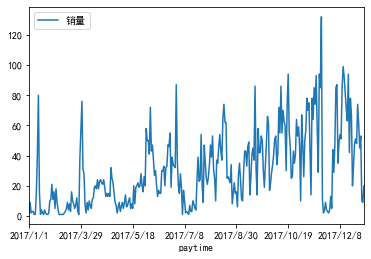

In [45]:
s44.plot()
plt.show()

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


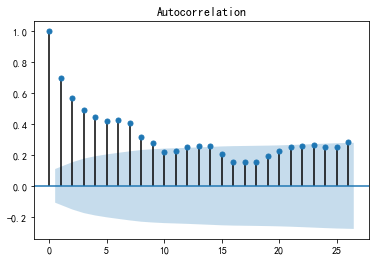

In [46]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(s44['销量']).show() 

In [47]:
from statsmodels.tsa.stattools import adfuller as ADF
print('原始序列的ADF检验结果为:',ADF(s44[u'销量']))

原始序列的ADF检验结果为: (-3.643203626277571, 0.004986800747368231, 7, 316, {'1%': -3.4512146067362317, '5%': -2.870730188960711, '10%': -2.5716664849383113}, 2618.928321254707)


In [48]:
D_s44 = s44.diff(1).dropna()
D_s44.columns = [u'销量差分']

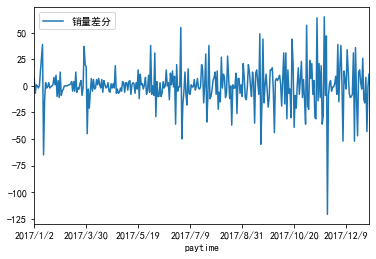

In [49]:
D_s44.plot()
plt.show()

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """Entry point for launching an IPython kernel.


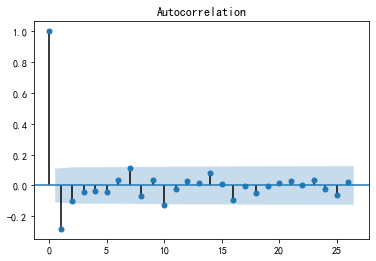

In [50]:
plot_acf(D_s44).show()
plt.show()

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """Entry point for launching an IPython kernel.


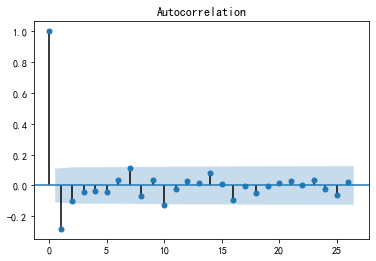

In [51]:
plot_acf(D_s44).show()
plt.show()

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


差分序列的ADF检验结果为： (-7.292215736308587, 1.4075513343730618e-10, 10, 312, {'1%': -3.4514843502727306, '5%': -2.8708485956333556, '10%': -2.571729625657462}, 2621.8117169647053)


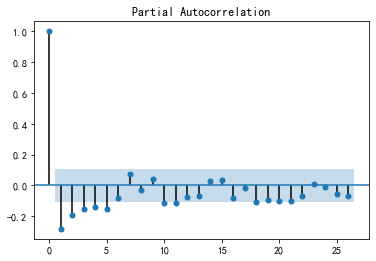

In [52]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(D_s44).show()
print(u'差分序列的ADF检验结果为：', ADF(D_s44[u'销量差分']))

In [55]:
from statsmodels.stats.diagnostic import acorr_ljungbox
print(u'差分序列的白噪声检验结果为：', acorr_ljungbox(D_s44, lags=1))

差分序列的白噪声检验结果为： (array([25.9006448]), array([3.59449058e-07]))


In [56]:
from statsmodels.tsa.arima_model import ARIMA
pmax = int(len(D_s44)/10)
qmax = int(len(D_s44)/10)

In [ ]:
bic_matrix = [] 
for p in range(pmax+1):
 tmp = []
 for q in range(qmax+1):
#存在部分报错，所以用try来跳过报错。
    try: 
     tmp.append(ARIMA(s44, (p,1,q)).fit().bic)
    except:
     tmp.append(None)
bic_matrix.append(tmp)
bic_matrix = pd.DataFrame(bic_matrix) 
 
#先用stack展平，然后用idxmin找出最小值位置。
 
p,q = bic_matrix.stack().idxmin() 

In [63]:
model3 = ARIMA(s44, (2,1,2)).fit() 
 
#给出一份模型报告
 
model3.summary2() 

D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
D:\Anaconda\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: ARIMA
===================================================================
Model:              ARIMA            BIC:                 2783.3795
Dependent Variable: D.销量             Log-Likelihood:      -1374.4  
Date:               2019-08-26 23:41 Scale:               1.0000   
No. Observations:   323              Method:              css-mle  
Df Model:           5                Sample:              1        
Df Residuals:       318                                   4        
Converged:          1.0000           S.D. of innovations: 16.891   
No. Iterations:     17.0000          HQIC:                2769.762 
AIC:                2760.7136                                      
--------------------------------------------------------------------
                 Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
--------------------------------------------------------------------
const            0.1523    0.0221   6.8934  0.0000   0.1090   0.1956
ar.L1.D.销量      -0.4345    0.0479  -9.0726  0.0000  -0.5284  -0.3407
ar.L2.D.销量       0.5363    0.0482  11.1367  0.0000   0.4419   0.6307
ma.L1.D.销量      -0.0000       nan      nan     nan      nan      nan
ma.L2.D.销量      -1.0000       nan      nan     nan      nan      nan
----------------------------------------------------------------------------
                Real           Imaginary          Modulus          Frequency
----------------------------------------------------------------------------
AR.1          -1.0192             0.0000           1.0192             0.5000
AR.2           1.8294             0.0000           1.8294             0.0000
MA.1           1.0000             0.0000           1.0000             0.0000
MA.2          -1.0000             0.0000           1.0000             0.5000
===================================================================

"""

In [64]:
model3.forecast(31)

(array([36.25161057, 44.67290666, 49.86666272, 52.2632423 , 54.14424543,
        54.74907169, 55.63191248, 55.70949684, 56.28609444, 56.2139743 ,
        56.69137526, 56.58206778, 57.02242553, 56.90926965, 57.33143227,
        57.22411867, 57.63398407, 57.53514732, 57.93473393, 57.84490999,
        58.23506747, 58.15417457, 58.53539416, 58.46317501, 58.83583195,
        58.77198548, 59.13641187, 59.08063232, 59.43713912, 59.38912738,
        59.73801134]),
 array([16.89148249, 19.40506808, 20.01635275, 20.23840783, 20.2823034 ,
        20.30813599, 20.30993523, 20.31452333, 20.31456802, 20.31610704,
        20.31653269, 20.31743294, 20.31801386, 20.31871954, 20.31931827,
        20.31993725, 20.32051007, 20.32107379, 20.32160984, 20.32212941,
        20.32262766, 20.32310833, 20.32357049, 20.32401568, 20.32444409,
        20.32485658, 20.32525362, 20.32563585, 20.3260038 , 20.32635801,
        20.32669899]),
 array([[ 3.14491325, 69.3583079 ],
        [ 6.63967211, 82.70614122],
      

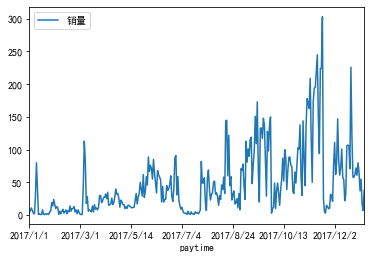

In [65]:
s55.plot()
plt.show()

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


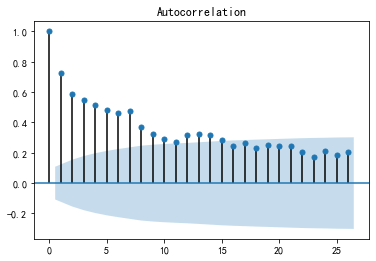

In [66]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(s55['销量']).show() 


In [67]:
from statsmodels.tsa.stattools import adfuller as ADF
print('原始序列的ADF检验结果为:',ADF(s55[u'销量']))

原始序列的ADF检验结果为: (-2.8299190691083167, 0.05412549786459047, 11, 318, {'1%': -3.451082300831733, '5%': -2.87067210822307, '10%': -2.5716355136268345}, 3089.7794210580414)


In [68]:
D_s55 = s55.diff(1).dropna()
D_s55.columns = [u'销量差分']

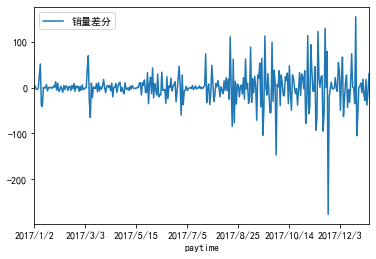

In [69]:
D_s55.plot()
plt.show()

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """Entry point for launching an IPython kernel.


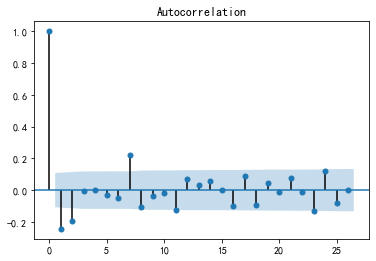

In [70]:
plot_acf(D_s55).show()
plt.show()

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


差分序列的ADF检验结果为： (-7.6363470840745284, 1.947829092971757e-11, 10, 318, {'1%': -3.451082300831733, '5%': -2.87067210822307, '10%': -2.5716355136268345}, 3087.2987206390935)


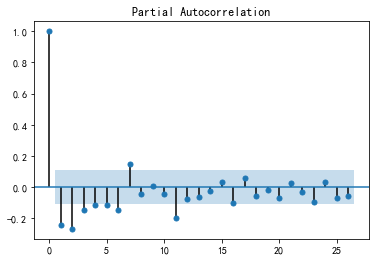

In [71]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(D_s55).show()
print(u'差分序列的ADF检验结果为：', ADF(D_s55[u'销量差分']))


In [72]:
from statsmodels.stats.diagnostic import acorr_ljungbox
print(u'差分序列的白噪声检验结果为：', acorr_ljungbox(D_s55, lags=1))

差分序列的白噪声检验结果为： (array([19.77279157]), array([8.72154201e-06]))


In [73]:
from statsmodels.tsa.arima_model import ARIMA
pmax = int(len(D_s55)/10)
qmax = int(len(D_s55)/10)


In [ ]:

bic_matrix = [] 
for p in range(pmax+1):
 tmp = []
 for q in range(qmax+1):
#存在部分报错，所以用try来跳过报错。
    try: 
     tmp.append(ARIMA(s44, (p,1,q)).fit().bic)
    except:
     tmp.append(None)
bic_matrix.append(tmp)
bic_matrix = pd.DataFrame(bic_matrix) 
 
#先用stack展平，然后用idxmin找出最小值位置。
 
p,q = bic_matrix.stack().idxmin() 

In [76]:
model4 = ARIMA(s55, (2,1,2)).fit() 
 
#给出一份模型报告
 
model4.summary2()

D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
D:\Anaconda\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: ARIMA
===================================================================
Model:              ARIMA            BIC:                 3284.4216
Dependent Variable: D.销量             Log-Likelihood:      -1624.8  
Date:               2019-08-26 23:50 Scale:               1.0000   
No. Observations:   329              Method:              css-mle  
Df Model:           5                Sample:              1        
Df Residuals:       324                                   0        
Converged:          1.0000           S.D. of innovations: 33.493   
No. Iterations:     16.0000          HQIC:                3270.731 
AIC:                3261.6452                                      
--------------------------------------------------------------------
               Coef.   Std.Err.      t      P>|t|    [0.025   0.975]
--------------------------------------------------------------------
const          0.2867    0.0492     5.8337  0.0000   0.1904   0.3831
ar.L1.D.销量    -0.3780    0.0455    -8.3007  0.0000  -0.4672  -0.2887
ar.L2.D.销量     0.6013    0.0460    13.0827  0.0000   0.5113   0.6914
ma.L1.D.销量    -0.0000    0.0041    -0.0000  1.0000  -0.0079   0.0079
ma.L2.D.销量    -1.0000    0.0041  -246.7482  0.0000  -1.0079  -0.9921
----------------------------------------------------------------------------
                Real           Imaginary          Modulus          Frequency
----------------------------------------------------------------------------
AR.1          -1.0130             0.0000           1.0130             0.5000
AR.2           1.6416             0.0000           1.6416             0.0000
MA.1           1.0000             0.0000           1.0000             0.0000
MA.2          -1.0000             0.0000           1.0000             0.5000
===================================================================

"""

In [77]:
model4.forecast(31) 

(array([ 56.33683621,  76.46749991,  80.10817241,  91.06024433,
         89.33269741,  96.79430358,  93.15790055,  99.24202645,
         94.9783899 , 100.47125198,  96.05391188, 101.24931663,
         96.85197741, 101.86094856,  97.54610271, 102.41178344,
         98.20070365, 102.94099739,  98.8397089 , 103.46310443,
         99.47202199, 103.98346719, 100.10097007, 104.50405291,
        100.72781036, 105.02556939, 101.35303134, 105.54825761,
        101.97683568, 106.07218591, 102.59931942]),
 array([33.49264718, 39.4435239 , 41.30678629, 42.05391607, 42.28277463,
        42.39518064, 42.42085916, 42.44069584, 42.44255318, 42.44723066,
        42.44723066, 42.44891996, 42.44916007, 42.45009473, 42.45053043,
        42.45122072, 42.45172618, 42.45231651, 42.45283192, 42.45336976,
        42.4538723 , 42.45437491, 42.45485689, 42.45533122, 42.45579061,
        42.45623996, 42.4566768 , 42.45710309, 42.45751811, 42.45792276,
        42.45831692]),
 array([[ -9.30754602, 121.98121844],
 